# Missing value Analysis

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as mano
%matplotlib inline

In [2]:
# Reading House PRrice Excel Price
mvadf = pd.read_csv("nyc-rolling-sales-dirty.csv",skipinitialspace=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#list all columns
mvadf.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
# Naming first unnamed column
mvadf = mvadf.rename(columns={'Unnamed: 0':'SNO_AREA'})

In [5]:
# Data types of Each Column
mvadf.dtypes

SNO_AREA                            int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                         float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

# Dealing with Incorrect Values

Based on the background knowledge checking the values in different column if there is any incorrect values, and replacing them with Null.

In [6]:
# "TAX CLASS AT PRESEN" must be a numeric column {1,2,3,4} some entries have a charecter appended  A, B , C with values 
# so removing these characters and converting to numeric
mvadf['TAX CLASS AT PRESENT'] = mvadf['TAX CLASS AT PRESENT'].replace(r'\D', '',regex=True)
mvadf['TAX CLASS AT PRESENT'] = pd.to_numeric(mvadf['TAX CLASS AT PRESENT'], errors='coerce')


# "LOT" should only contain numeric value so converting non numeric values to null
mvadf['LOT'] = pd.to_numeric(mvadf['LOT'], errors='coerce')

#Checking for any incorrect values. By background knowledge we know that "BUILDING CLASS AT PRESENT " values start with Alphabet
# follow by alphabet or number[0-9] like "C9" so checking if any value start with number will be error.
mvadf["BUILDING CLASS AT PRESENT"] = mvadf["BUILDING CLASS AT PRESENT"].replace('^\s*[0-9]', np.nan, regex=True)

# "LAND SQUARE FEET" should only contain numeric value so converting non numeric values to null
mvadf['LAND SQUARE FEET'] = pd.to_numeric(mvadf['LAND SQUARE FEET'], errors='coerce')

# "GROSS SQUARE FEET" should only contain numeric value so converting non numeric values to null
mvadf['GROSS SQUARE FEET'] = pd.to_numeric(mvadf['GROSS SQUARE FEET'], errors='coerce')


#Checking for any incorrect values. By background knowledge we know that "BUILDING CLASS AT TIME OF SALE " values start
#with Alphabet follow by alphabet or number[0-9] like "C9" so checking if any value start with number will be error.
mvadf["BUILDING CLASS AT TIME OF SALE"] = mvadf["BUILDING CLASS AT TIME OF SALE"].replace('^\s*[0-9]', np.nan, regex=True)

# Replacing Sale Price '-' with zeros as those signifies transfer of ownership without a cash consideration.
#mvadf['SALE PRICE'] = mvadf['SALE PRICE'] .replace('-', 0)
# "SALE PRICE" should only contain numeric value so converting non numeric values to null
#mvadf['SALE PRICE'] = pd.to_numeric(mvadf['SALE PRICE'], errors='coerce')

# "SALE DATE" should only contain date type value so converting non date values to null
mvadf['SALE DATE'] = pd.to_datetime(mvadf['SALE DATE'], errors='coerce')

# Now checkind the datatypes
mvadf.dtypes

SNO_AREA                                   int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                     float64
BLOCK                                    float64
LOT                                      float64
EASE-MENT                                float64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE          

In [8]:
#Visualizing Data
mvadf.head(10)

,SNO_AREA,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2.0,392.0,NaN,NaN,NaN,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000,NaT
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2.0,399.0,26.0,NaN,C7,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,-,2016-12-14
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39.0,NaN,C7,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,-,2016-12-09
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21.0,NaN,C4,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55.0,NaN,C2,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16.0,NaN,C4,NaN,...,20,0,20,2581.0,9730.0,1900,2,C4,-,NaT
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32.0,NaN,C4,NaN,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840,2016-09-23
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18.0,NaN,C7,NaN,...,44,2,46,5163.0,21007.0,1900,2,C7,-,2017-07-20
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34.0,NaN,D5,NaN,...,15,0,15,1534.0,9198.0,1920,2,D5,-,2017-06-20
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2.0,387.0,153.0,NaN,D9,NaN,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000,2016-11-07


In [9]:
# Data Size
mvadf.shape

(84548, 22)

In [10]:
#Checking Missing values
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Missing values Graphs

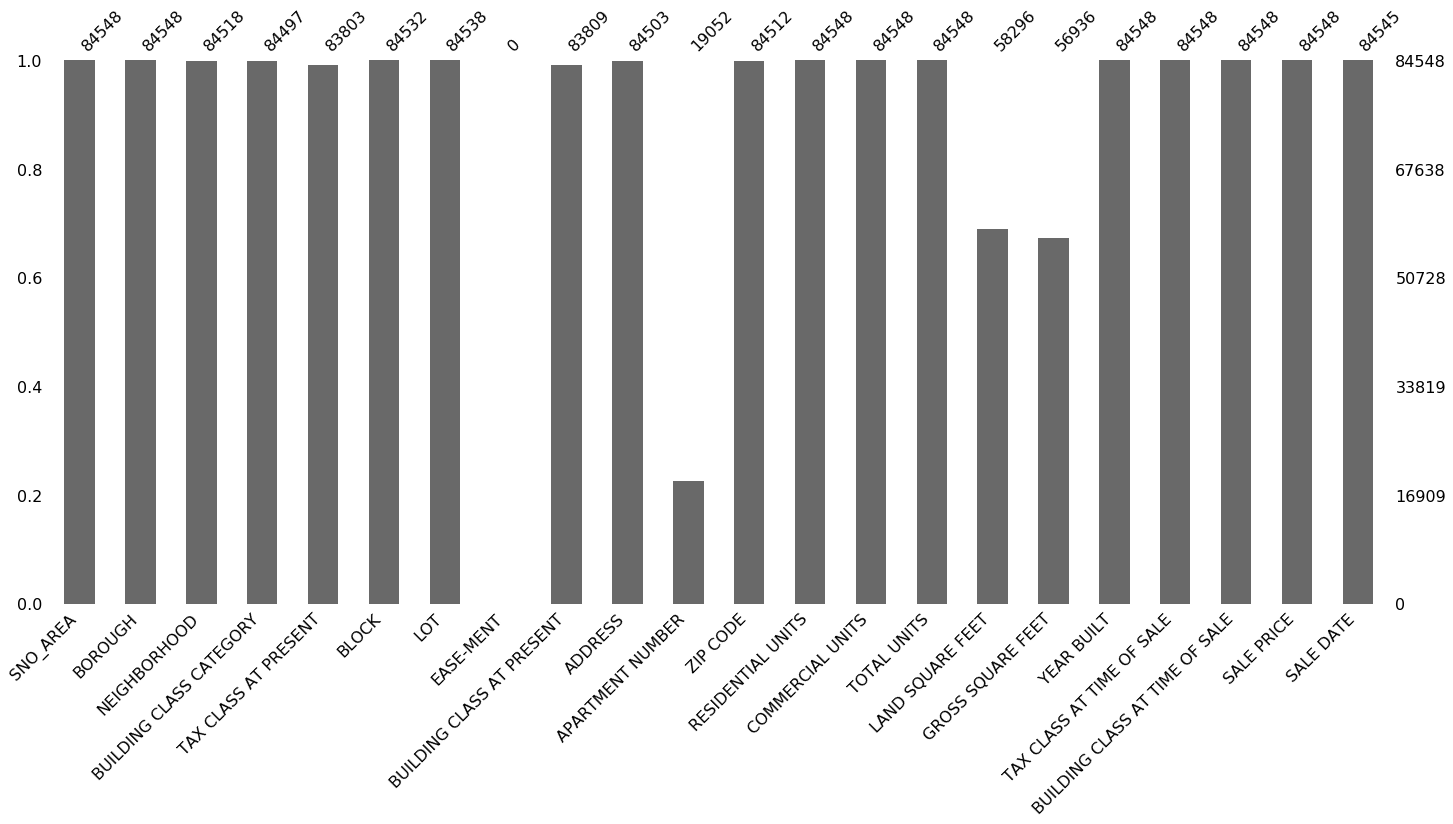

In [11]:
#In this graph we can visually see the missing values and some column have zero or very less values  need to be droped
mano.bar(mvadf)

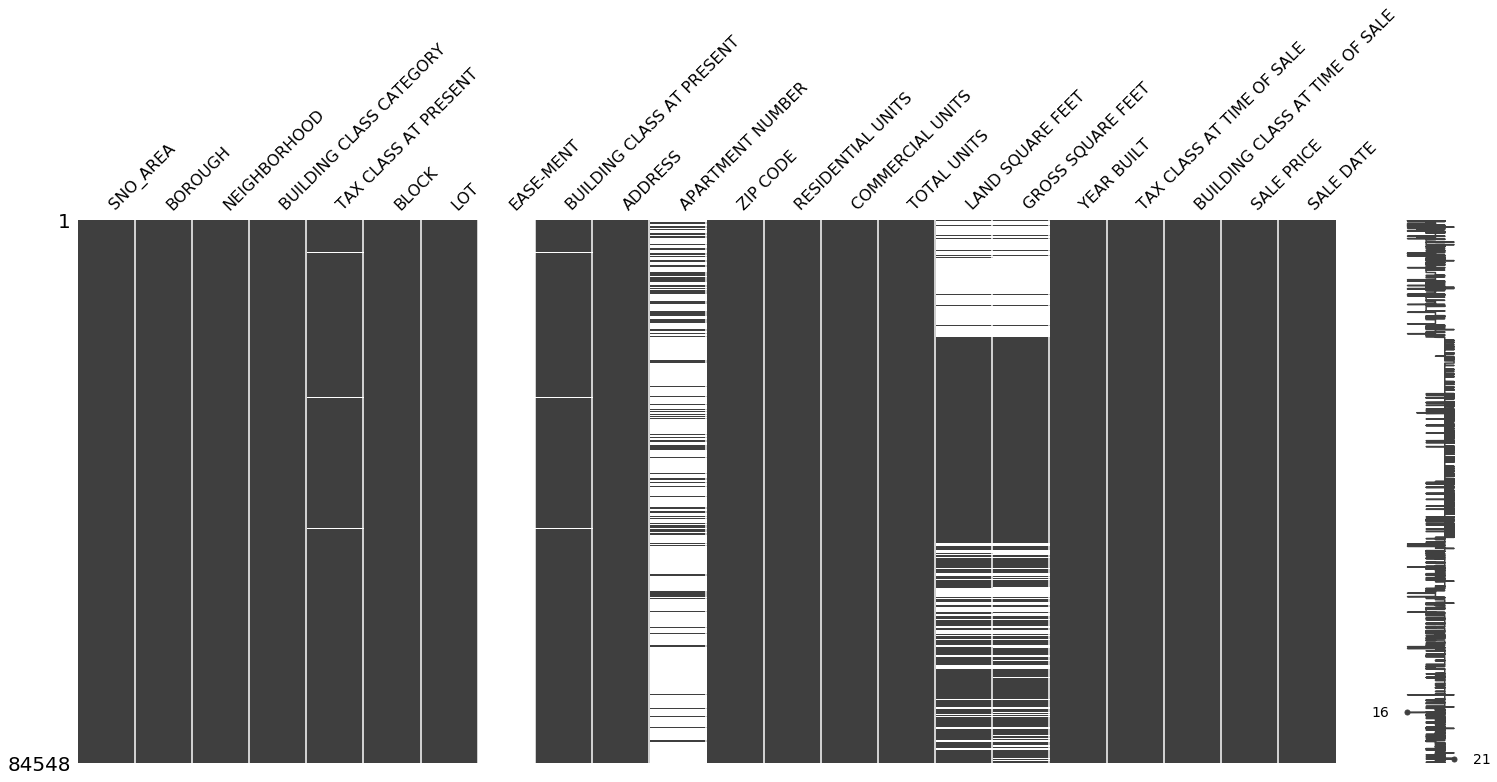

In [12]:
# visualize the location of the missingness of data using mano.matrix
mano.matrix(mvadf)

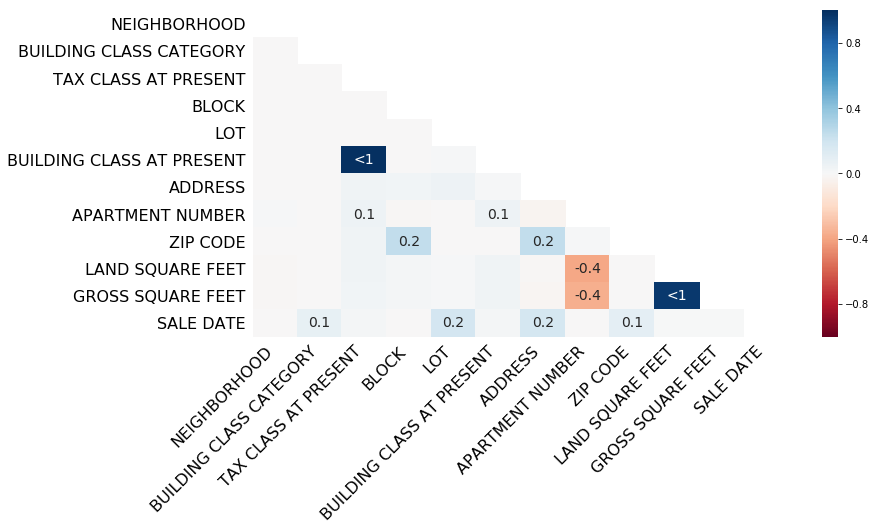

In [13]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns and ony few classes 
# have corelation like tax and building class and land square feet with gross square feet this can be used for
# interpolation of missing values in thes columns
mano.heatmap(mvadf, figsize=(12,6))

# Dealing with missing values column by column

## Column "Neighborhood"
After traversing data it was found that first column is the serial no with respect to borough so for filling the missing values of neighborhood we can sort data withrespect to BOROUGH & Sno_Area(1st column) and fill the neighbrhood with previous or next value based on BOROUGH & Sno_Area(1st column) no.

In [14]:
mvadf.sort_values(by=['BOROUGH', 'SNO_AREA'])
mvadf['NEIGHBORHOOD'].fillna(method='pad', inplace=True)
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "Building Class Category"
"Building Class Category" and "BUILDING CLASS AT PRESENT" are related. So will insert the missing values in "Building Class Category" by finding their respective categry in "BUILDING CLASS AT PRESENT" and insert the most repeated values withrespect to groupig of  "BUILDING CLASS AT PRESENT"

In [15]:
uniq_cat = mvadf[mvadf['BUILDING CLASS CATEGORY'].isna()]['BUILDING CLASS AT PRESENT'].unique()
#mvadf.loc[mvadf['BUILDING CLASS AT PRESENT']== x ,'BUILDING CLASS CATEGORY'].mode()
for x in uniq_cat:
    rep =  mvadf[mvadf['BUILDING CLASS AT PRESENT']== x ]['BUILDING CLASS CATEGORY'].mode()
    mvadf.loc[(mvadf['BUILDING CLASS CATEGORY'].isna()) & (mvadf['BUILDING CLASS AT PRESENT'] == x),'BUILDING CLASS CATEGORY'] = rep[0]
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                  10
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "TAX CLASS AT PRESENT"
This contain Tax class of the building we also have tax class at the time of sale and tax class most probably reamin the same. So inserting missing values in "TAX CLASS AT PRESENT" with respective values in  "TAX CLASS AT TIME OF SALE"

In [16]:
# Replacing mising values with the values at the time of sale
mvadf['TAX CLASS AT PRESENT'] = mvadf.apply(\
    lambda row: row['TAX CLASS AT TIME OF SALE'] if pd.isnull(row['TAX CLASS AT PRESENT']) else row['TAX CLASS AT PRESENT'],axis=1)
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                16
LOT                                  10
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "BLOCK"
Inserting most frequent values of block in missing values on the basis of grouping withrespect to "Neighborhood" class.

In [17]:
uniq_cat = mvadf[mvadf['BLOCK'].isna()]['NEIGHBORHOOD'].unique()
for x in uniq_cat:
    rep =  mvadf[mvadf['NEIGHBORHOOD']== x ]['BLOCK'].mode()
    mvadf.loc[(mvadf['BLOCK'].isna()) & (mvadf['NEIGHBORHOOD'] == x),'BLOCK'] = rep[0]
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                  10
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "LOT"
Colomn LOT doesnot have missing values but this column have data entry errors which are converted into missing values.
Same as block Lot is used to define the area of property so using same techniques to fill missing values.

In [18]:
uniq_cat = mvadf[mvadf['LOT'].isna()]['NEIGHBORHOOD'].unique()
for x in uniq_cat:
    rep =  mvadf[mvadf['NEIGHBORHOOD']== x ]['LOT'].mode()
    mvadf.loc[(mvadf['LOT'].isna()) & (mvadf['NEIGHBORHOOD'] == x),'LOT'] = rep[0]
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "EASE-MENT "

This column is no use because all of its rows are empty so dropping it.

In [19]:
mvadf = mvadf.drop(columns='EASE-MENT')
print(mvadf.shape)
mvadf.isnull().sum()

(84548, 21)


SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           739
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "BUILDING CLASS AT PRESENT "
Inserting most frequent values in missing values with respect to grouping of "Building Class Category" coloumn

In [20]:

uniq_cat = mvadf[mvadf['BUILDING CLASS AT PRESENT'].isna()]['BUILDING CLASS CATEGORY'].unique()
#mvadf.loc[mvadf['BUILDING CLASS AT PRESENT']== x ,'BUILDING CLASS CATEGORY'].mode()
for x in uniq_cat:
    rep =  mvadf[mvadf['BUILDING CLASS CATEGORY']== x ]['BUILDING CLASS AT PRESENT'].mode()
    mvadf.loc[(mvadf['BUILDING CLASS AT PRESENT'].isna()) & (mvadf['BUILDING CLASS CATEGORY'] == x),'BUILDING CLASS AT PRESENT'] = rep[0]
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             3
dtype: int64

## Column "Address " & "Date"
Since address is not easy to fill and we have only 45 missing values in Address column so dropping the rows with missing address. Also we have only 3 column with date missing so also droping those.

In [21]:
mvadf = mvadf.dropna(subset=['ADDRESS','SALE DATE'])
print(mvadf.shape)
mvadf.isnull().sum()

(84502, 21)


SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                  65484
ZIP CODE                             26
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26251
GROSS SQUARE FEET                 27611
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

## Column "ZIP CODE"
Filling missing zip code with respect moast frequent values withrespect to grouping of BOROUGH

In [22]:
uniq_cat = mvadf[mvadf['ZIP CODE'].isna()]['BOROUGH'].unique()
for x in uniq_cat:
    rep =  mvadf[mvadf['BOROUGH']== x ]['ZIP CODE'].mode()
    mvadf.loc[(mvadf['ZIP CODE'].isna()) & (mvadf['BOROUGH'] == x),'ZIP CODE'] = rep[0]
mvadf.isnull().sum()

SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                  65484
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26251
GROSS SQUARE FEET                 27611
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

## Column "APARTMENT NUMBER"
Droping APARTMENT NUMBER as there are many missing value sand not possible to fill right values.

In [23]:
mvadf = mvadf.drop(columns='APARTMENT NUMBER')
print(mvadf.shape)
mvadf.isnull().sum()

(84502, 20)


SNO_AREA                              0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26251
GROSS SQUARE FEET                 27611
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

## Column "LAND SQUARE FEET" & "GROSS SQUARE FEET"
Filling GROSS SQUARE FEET and LAND SQUARE FEET using linear interpolation as this is logical to fill these missing values using interpolation

In [24]:
mvadf['GROSS SQUARE FEET'] = mvadf['GROSS SQUARE FEET'].interpolate(method ='linear', limit_direction ='forward')
mvadf['LAND SQUARE FEET'] = mvadf['LAND SQUARE FEET'].interpolate(method ='linear', limit_direction ='forward')
mvadf.isnull().sum()

SNO_AREA                          0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64